# 作业说明
在Pima Indians Diabetes Data Set（皮马印第安人糖尿病数据集）进行分类器练习，数据集只有一个文件（diabetes.csv）：Pima Indians Diabetes Dataset 包括根据医疗记录的比马印第安人5 年内糖尿病的发病情况，这是一个两类分类问题。每个类的样本数目数量不均等。一共有 768 个样本，每个样本有8 个输入变量和1 个输出变量。缺失值通常用零值编码。

1) 字段说明  
    Pregnancies： 怀孕次数  
    Glucose： 口服葡萄糖耐受试验中，2 小时的血浆葡萄糖浓度。  
    BloodPressure： 舒张压（mm Hg）  
    SkinThickness： 三头肌皮肤褶层厚度（mm）  
    Insulin：2 小时血清胰岛素含量（μU/ ml）  
    BMI： 体重指数（体重，kg /（身高，m）^ 2）  
2) DiabetesPedigreeFunction： 糖尿病家族史  
3) Age： 年龄（岁）  
    Outcome： 输出变了/类别标签（0 或 1，出现糖尿病为1, 否则为 0）  

## 导入必要工具包

In [458]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import GridSearchCV

#竞赛的评价指标为logloss
#from sklearn.metrics import log_loss  
#SVM并不能直接输出各类的概率，所以在这个例子中我们用正确率作为模型预测性能的度量
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

## 读取数据 & 数据探索

In [459]:
# 读取数据
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [460]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [461]:
# 各属性统计特征
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


从数据的大致取值可以看出，数据没有做脱敏处理，有单位和具体的物理含义，train.info虽然显示没有缺失值，但有些特征数据明显不对，如舒张压和体重等特征都不应该存在零值，（舒张压为0是说明这个人已经挂了么，体重身高比为0[捂脸]）应该是存在缺失值，但直接使用了零值进行填充，

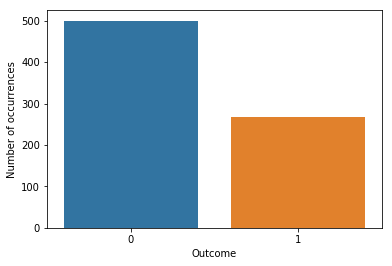

In [462]:
# Target 分布，看看各类样本分布是否均衡
sns.countplot(data.Outcome);
pyplot.xlabel('Outcome');
pyplot.ylabel('Number of occurrences');

分类结果中正例的样本约为反例样本的一半多一些，样本不均衡，交叉验证对分类任务缺省的是采用StratifiedKFold，在每折采样时根据各类样本按比例采样

In [463]:
# 单变量分布

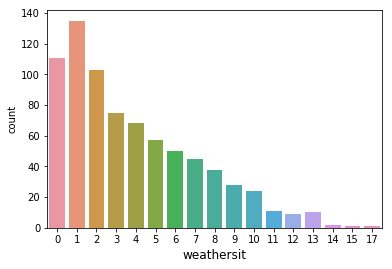

In [464]:
#Pregnancies：离散变量，用countplot
fig = plt.figure()
# sns.distplot(data.weathersit.values, bins=30, kde=False)
sns.countplot(data.Pregnancies.values)
plt.xlabel('weathersit', fontsize=12)
plt.show()

随怀孕次数增多，样本逐渐减少，大多集中在0-2次，十次以上的样本非常少,比较符合常理

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


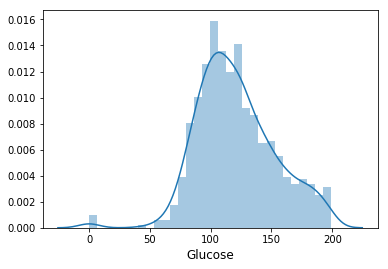

In [465]:
#Glucose
fig = plt.figure()
sns.distplot(data.Glucose.values, bins=30, kde=True)#
plt.xlabel('Glucose', fontsize=12)
#在画板上显示
plt.show()

血浆葡萄糖浓度，正常情况下应该不会出现0值，应该是数据缺失，除了0值，其他的数据大致正态分布，符合常理

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


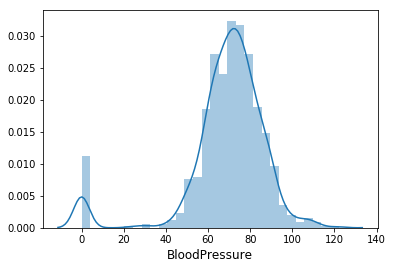

In [466]:
fig = plt.figure()
sns.distplot(data.BloodPressure.values, bins=30, kde=True)
plt.xlabel('BloodPressure', fontsize=12)
#在画板上显示
plt.show()

舒张压也不应该出现0值，除非这个人挂了，其他的数据大致成正态分布，60-80之间属于正常值，人数最多，符合常理

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


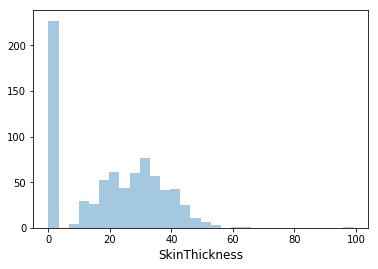

In [467]:
fig = plt.figure()
sns.distplot(data.SkinThickness.values, bins=30, kde=False)
plt.xlabel('SkinThickness', fontsize=12)
#在画板上显示
plt.show()

三头肌皮肤褶层厚度，测量方法大概就是：揪起身上的一块肉（三头肌上的肉），测一下看知道自己是不是肥胖，即使瘦的皮包骨头也不该为0，但数据显示有230左右个0值，说明数据大概有1/3的样本数据缺失，缺失数据太多了，可以考虑去掉这个特征

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


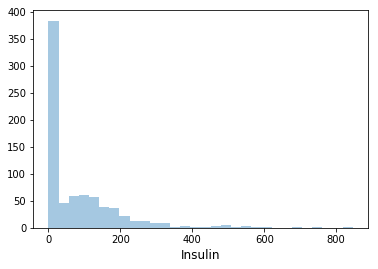

In [468]:
fig = plt.figure()
sns.distplot(data.Insulin.values, bins=30, kde=False)
plt.xlabel('Insulin', fontsize=12)
#在画板上显示
plt.show()

人体血糖水平是动态平衡的，餐后血糖上升，用于降血糖的胰岛素含量也会上升用于调节血糖，故正常人2 小时血清胰岛素含量这个特征应该是在某个区间，但不该为0，上图有一半以上的数据都是0，可以考虑去掉该特征

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


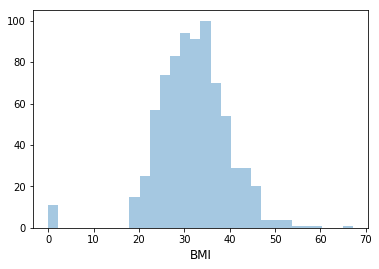

In [469]:
fig = plt.figure()
sns.distplot(data.BMI.values, bins=30, kde=False)
plt.xlabel('BMI', fontsize=12)
#在画板上显示
plt.show()

数据反映被调查人的体重身高比，正常不应为0

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


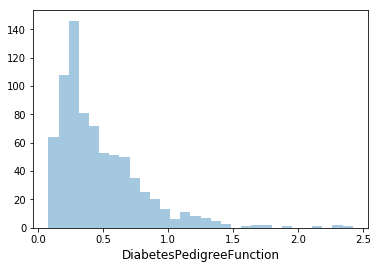

In [470]:
fig = plt.figure()
sns.distplot(data.DiabetesPedigreeFunction.values, bins=30, kde=False)
plt.xlabel('DiabetesPedigreeFunction', fontsize=12)
#在画板上显示
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


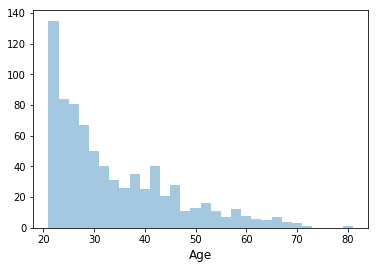

In [471]:
fig = plt.figure()
sns.distplot(data.Age.values, bins=30, kde=False)
plt.xlabel('Age', fontsize=12)
#在画板上显示
plt.show()

反映被调查人的年龄阶段分布

## 数据准备

In [472]:
data = data.drop('SkinThickness', axis=1)
#data = data.drop('Insulin', axis=1)

data.shape

(768, 8)

In [473]:
for i in range(768):
    if data.Glucose.values[i] == 0:
        data.Glucose.values[i] = 117
    if data.BloodPressure.values[i] == 0:
        data.BloodPressure.values[i] = 72
    if data.BMI.values[i] == 0:
        data.BMI.values[i] = 32
        
data.shape

(768, 8)

从特征工程可看出，有三个特征对应的样本数据存在少部分缺失，其中零值即为缺失值，使用对应特征的中位数进行替换填充，由于读取的数据文件缺失值使用了零值编码，而不是直接空着，无法使用sklearn.preprocessing.Imputer进行填充，故使用循环判断的方式进行填充 

其中中位数如下：  
Glucose ：117  
BloodPressure ：72  
BMI ：32  

In [474]:
# 从原始数据中分离输入特征x和输出y
y = data['Outcome'].values
X = data.drop('Outcome', axis = 1)

#用于后续显示权重系数对应的特征
#columns = X.columns

In [475]:
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split

# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)
X_train.shape

(614, 7)

In [476]:
X_train = np.array(X_train)
X_test = np.array(X_test)

## 数据预处理

In [477]:
# 数据标准化
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

## 模型训练

### 1 Logistic Regression

### 1.1 default Logistic Regression

In [478]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

# 交叉验证用于评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.cross_validation import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')
print ('logloss of each fold is: ',-loss)
print('cv logloss is:', -loss.mean())

loss_y = cross_val_score(lr, X_test, y_test, cv=5, scoring='neg_log_loss')
print ('logloss of each fold is: ',-loss_y)
print('cv logloss is:', -loss_y.mean())

logloss of each fold is:  [0.45679707 0.47306945 0.52941982 0.4177863  0.46965247]
cv logloss is: 0.469345022245065
logloss of each fold is:  [0.56949772 0.46030145 0.58767129 0.5112334  0.72386985]
cv logloss is: 0.5705147428359226


使用缺省参数的logistic回归模型，即正则函数penalty='l2',正则参数C=1.0  
使用5折交叉验证来评价模型性能和参数调优，其中评价指标选择neg_log_loss，由于是负数，打印结果进行取反，其中损失值越小越好，最终得出的logloss值为0.48012474004701106

### 1.2 正则化的 Logistic Regression及参数调优

目标函数：J = sum(logloss(f(xi), yi)) + C* penalty  

需要调整的超参数：  
1）C 正则系数，一般在log域（取log后的值）均匀设置候选参数  
2）penalty 正则函数（L2/L1）

skilearn中调用方法：置候选参数集合，以字典形式存储，调用GridSearchCV，调用fit

In [479]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=0)

查看交叉网格搜索的完整结果（存放在cv_results_中）

In [480]:
# view the complete results (list of named tuples)
grid.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([0.00120049, 0.00160117, 0.00080028, 0.00160131, 0.00140061,
        0.00140114, 0.00120091, 0.00100079, 0.00160098, 0.00100121,
        0.00120068, 0.00100088, 0.00140114, 0.001401  ]),
 'mean_score_time': array([0.00120087, 0.00120053, 0.00120091, 0.00100074, 0.00080075,
        0.00080066, 0.00080013, 0.00100069, 0.00060039, 0.00100045,
        0.00100064, 0.00100074, 0.00080037, 0.00100036]),
 'mean_test_score': array([-0.69314718, -0.63827633, -0.66359655, -0.51918011, -0.47469286,
        -0.46995731, -0.46980448, -0.46940806, -0.47001165, -0.46998406,
        -0.47005338, -0.47005365, -0.47005963, -0.47006074]),
 'mean_train_score': array([-0.69314718, -0.63754022, -0.66249583, -0.51492301, -0.46466932,
        -0.45830275, -0.45386193, -0.4537296 , -0.45364807, -0.45364673,
        -0.45364583, -0.45364581, -0.4536458 , -0.4536458 ]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
                    100, 1000, 1000

取出交叉搜索得出的最优超参数 C 和 penalty，以及分数

In [481]:
# examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.46940805697936966
{'C': 1, 'penalty': 'l2'}


得出最优超参数 C = 0.1，l2正则，分数为0.4799994349368312，比缺省参数C=1，l2正则的0.48012474004701106好一点点，C = 1/lamda，则lamda=10,惩罚项还是挺大的  
由于C = 0.1在所设置的候选参数中间，所以以上的候选参数范围不需要变更，若最佳值在候选参数边缘，如0.001或1000，则再尝试更大的候选参数或更小的候选参数，直到找到拐点

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('std_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


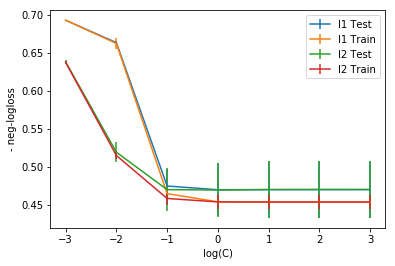

In [482]:
# plot CV误差曲线
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]


# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = -np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = -np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = -np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = -np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
    #pyplot.plot(log(Cs), test_scores[i], label= 'penalty:'   + str(value))
    pyplot.errorbar(x_axis, test_scores[:,i], yerr=test_stds[:,i] ,label = penaltys[i] +' Test')
    pyplot.errorbar(x_axis, train_scores[:,i], yerr=train_stds[:,i] ,label = penaltys[i] +' Train')
    
pyplot.legend()
pyplot.xlabel( 'log(C)' )                                                                                                      
pyplot.ylabel( '- neg-logloss' )
pyplot.savefig('LogisticGridSearchCV_C.png' )

pyplot.show()

在L1正则和L2正则下，不同的正则参数C对应的模型在训练集上和测试集上的负log损失，可以看出在训练集上C越大（正则越小）的模型性能越好，但在测试集上，L2正则时，当C=0.1(log(C)=-1)时性能最好，L1正则时，当C=1(log(C)=0)时性能最好

### 1.3 用LogisticRegressionCV实现正则化的 Logistic Regression

### 1.3.1 L1正则

In [483]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [0.01, 0.1, 1, 10, 100]

# LogisticRegressionCV比GridSearchCV快
lrcv_L1 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l1', solver='liblinear', multi_class='ovr')
lrcv_L1.fit(X_train, y_train)    

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l1',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

由缺省参数的logistic回归可得出，L1正则下，最优的正则系数C大概是1左右，故选取的候选区间以1为中心，取五个进行比较

In [484]:
lrcv_L1.scores_

{1: array([[-0.66245427, -0.4768886 , -0.45915544, -0.45675538, -0.45651994],
        [-0.66356146, -0.47456863, -0.47277464, -0.47276702, -0.47279156],
        [-0.66119179, -0.5088274 , -0.52875403, -0.53303202, -0.53349507],
        [-0.66721469, -0.4376201 , -0.41860592, -0.41747482, -0.41737729],
        [-0.66359927, -0.47525216, -0.46939851, -0.46971639, -0.46976873]])}

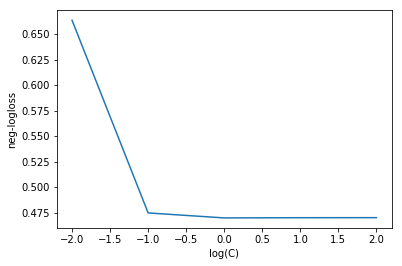

In [485]:
# scores_：dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)
#n_classes = 9
#scores =  np.zeros((n_classes,n_Cs))

#for j in range(n_classes):
#        scores[j][:] = np.mean(lrcv_L1.scores_[1],axis = 0)
scores =  np.zeros((1,n_Cs))
scores[0][:] = np.mean(lrcv_L1.scores_[1],axis = 0)
    
mse_mean = -np.mean(scores, axis = 0)
pyplot.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
pyplot.xlabel('log(C)')
pyplot.ylabel('neg-logloss')
pyplot.show()



In [486]:
lrcv_L1.coef_

array([[ 0.4169615 ,  1.13463756, -0.13764634, -0.12840004,  0.74003233,
         0.2035019 ,  0.13138584]])

### 1.3.2 L2正则

In [487]:
from sklearn.linear_model import LogisticRegressionCV

#Cs = [1, 10,100,1000]
Cs = [0.001, 0.01, 0.1, 1, 10]

# 大量样本（6W+）、高维度（93），L2正则 --> 缺省用lbfgs，为了和GridSeachCV比较，也用liblinear

lrcv_L2 = LogisticRegressionCV(Cs=Cs, cv = 5, scoring='neg_log_loss', penalty='l2', solver='liblinear', multi_class='ovr')
lrcv_L2.fit(X_train, y_train)    

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10], class_weight=None, cv=5,
           dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=True, scoring='neg_log_loss',
           solver='liblinear', tol=0.0001, verbose=0)

In [488]:
lrcv_L2.scores_

{1: array([[-0.63879793, -0.51815689, -0.46213674, -0.45679707, -0.45652485],
        [-0.64010309, -0.5273538 , -0.47779433, -0.47306945, -0.47281708],
        [-0.63994469, -0.53091418, -0.51152388, -0.52941982, -0.53310008],
        [-0.63308469, -0.49417598, -0.42488255, -0.4177863 , -0.41740083],
        [-0.63941407, -0.52515329, -0.47317231, -0.46965247, -0.46975751]])}

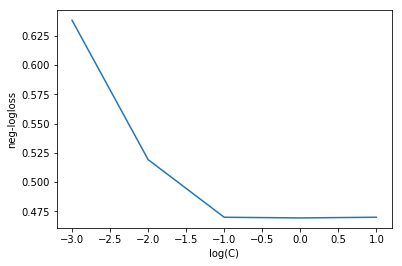

In [489]:
# scores_：dict with classes as the keys, and the values as the grid of scores obtained during cross-validating each fold,
# Each dict value has shape (n_folds, len(Cs))
n_Cs = len(Cs)
#n_classes = 9
#scores =  np.zeros((n_classes,n_Cs))

#for j in range(n_classes):
#        scores[j][:] = np.mean(lrcv_L1.scores_[1],axis = 0)
scores =  np.zeros((1,n_Cs))
scores[0][:] = -np.mean(lrcv_L2.scores_[1],axis = 0)
    
mse_mean = np.mean(scores, axis = 0)
pyplot.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
pyplot.xlabel('log(C)')
pyplot.ylabel('neg-logloss')
pyplot.show()

### 2 SVM

In [490]:
def LinearSVC_performance(C, X_train, y_train, X_test, y_test):
    
    # 在训练集是那个利用SVC训练
    SVC2 =  LinearSVC( C = C)
    SVC2 = SVC2.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC2.score(X_test, y_test)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

定义模型性能最终评估函数，在测试集上使用训练得到的LinearSVC（包含已确定的参数C）进行数据分类，并返回正确率

### 2.1 default SVC

由于LinerSVC是基于libliner实现的SVM的，而SVC/NuSVC是基于libsvm实现的，所以如果核函数想采用的线性核，linerSVC的训练效率更高一点，且可以有更多正则选择（L1/L2）和损失函数选择

In [491]:
from sklearn.svm import LinearSVC

SVC1_train = LinearSVC()

In [492]:
from sklearn.cross_validation import cross_val_score
accuracy = cross_val_score(SVC1_train, X_train, y_train, cv=5, scoring='accuracy')
print('accuracy of each fold is: ',accuracy)
print('cv accuracy is:', accuracy.mean())

accuracy of each fold is:  [0.78225806 0.74796748 0.74796748 0.80327869 0.80327869]
cv accuracy is: 0.7769500801829805


由于本数据集的样本数只有768个，数据量不大，使用交叉验证得出模型在训练集上的正确率比较合适  
上述结果得出，缺省参数（C = 1.0）的LinearSVC模型训练后，在训练集上的准确率为 0.7818414569656008

In [493]:
default_SVC_accuracy = LinearSVC_performance(1.0, X_train, y_train, X_test, y_test)
print('default SVC accuracy on test data:', default_SVC_accuracy)

accuracy: 0.7272727272727273
default SVC accuracy on test data: 0.7272727272727273


缺省参数（C = 1.0）的LinearSVC模型训练后，在测试集上的准确率为 0.7337662337662337，比训练集略低一点

### 2.2 线性SVM正则参数调优

In [494]:
from sklearn.model_selection import GridSearchCV
#Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#penaltys = ['l1','l2']
Cs = np.logspace(-3, 3, 7)
tuned_parameters = dict(C = Cs)

SVC3 = LinearSVC()
grid= GridSearchCV(SVC3, tuned_parameters,cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [495]:
grid.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([0.00140095, 0.00240083, 0.00680289, 0.03502355, 0.03522315,
        0.03682427, 0.03742414]),
 'mean_score_time': array([0.00060091, 0.00020046, 0.00040183, 0.        , 0.00080094,
        0.00080075, 0.00060096]),
 'mean_test_score': array([0.77687296, 0.77850163, 0.77687296, 0.7752443 , 0.7752443 ,
        0.73127036, 0.66612378]),
 'mean_train_score': array([0.77688189, 0.78257957, 0.78094361, 0.78053628, 0.78135426,
        0.7573349 , 0.67552484]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1.0},
  {'C': 10.0},
  {'C': 100.0},
  {'C': 1000.0}],
 'rank_test_score': array([2, 1, 2, 4, 4, 6, 7]),
 'split0_test_score': array([0.79032258, 0.78225806, 0.78225806, 0.77419355, 0.77419355,
        0.73387097, 0.74193548]),
 'split0_train_score': array

In [496]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.7785016286644951
{'C': 0.01}


In [497]:
default_SVC_accuracy = LinearSVC_performance(1.0, X_train, y_train, X_test, y_test)
print('default SVC accuracy on test data:', default_SVC_accuracy)

accuracy: 0.7272727272727273
default SVC accuracy on test data: 0.7272727272727273


发现最佳的参数 C 取值就是缺省参数 1.0，此时在训练集上得到的正确率是0.7817589576547231，和上面直接做缺省参数LinearSVC得到的准确率差不多  
第一次 缺省参数LinearSVC 训练集上正确率：0.7818414569656008  测试集上正确率： 0.7337662337662337  
第二次 参数调优LinearSVC 训练集上正确率：0.7817589576547231  测试集上正确率： 0.7337662337662337  

疑惑：同一个训练集，同一个参数C=1.0，为什么在训练集上得到的准确率不同，第二次的参数调优得出的准确率还略低于第一次的  
猜测：虽然是同一个训练集，但第一次直接用了5折交叉验证，第二次在gridcv中又重新用了一次5折交叉验证，两次交叉验证是独立的，并且都是随机的将训练集划分为5份，因为不是用的不是一模一样的划分，所以造成训练结果有略微的差别，但在测试集上由于参数相同，而且是直接fit的，所以得出结果一样

### 2.3 RBF核SVM正则参数调优

In [498]:
def LinearSVC_performance(C, gamma, X_train, y_train, X_test, y_test):
    
    # 在训练集是那个利用SVC训练
    SVC4 =  SVC(C = C, kernel='rbf', gamma = gamma)
    SVC4 = SVC4.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC4.score(X_test, y_test)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

In [499]:
from sklearn.svm import SVC

In [500]:
from sklearn.model_selection import GridSearchCV

C_s = np.logspace(-3, 3, 7)
gamma_s = np.logspace(-3, 3, 7) 
tuned_parameters = dict(gamma = gamma_s, C = C_s)

SVC5 = SVC()
grid= GridSearchCV(SVC5, tuned_parameters,cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]), 'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [501]:
# view the complete results (list of named tuples)
grid.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([0.01160765, 0.00900545, 0.00900555, 0.008605  , 0.0108068 ,
        0.02101483, 0.02281551, 0.00920563, 0.00920615, 0.00880718,
        0.01060681, 0.01721072, 0.02221527, 0.02341447, 0.00900607,
        0.00900569, 0.0088068 , 0.01100678, 0.0196126 , 0.02341561,
        0.02461438, 0.00900478, 0.00800524, 0.00880499, 0.01380892,
        0.02121468, 0.02441669, 0.02541647, 0.00820479, 0.00900631,
        0.01220746, 0.01701059, 0.02721648, 0.03162007, 0.03402247,
        0.00960569, 0.01560993, 0.0402266 , 0.0192122 , 0.03042006,
        0.03142047, 0.02941885, 0.01400938, 0.06924548, 0.1168776 ,
        0.01761208, 0.02701678, 0.02941861, 0.02941875]),
 'mean_score_time': array([0.00260119, 0.00220184, 0.00200233, 0.00200162, 0.00200138,
        0.00500236, 0.00560317, 0.00200133, 0.00200167, 0.00200133,
        0.00240197, 0.0028019 , 0.00520263, 0.00620513, 0.00220141,
        0.00200143, 0.00200114, 0.00240154, 0.00280151, 0.00540428,
        0.00560365, 0.

In [502]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.7768729641693811
{'C': 10.0, 'gamma': 0.01}


0.7768729641693811
{'C': 1.0, 'gamma': 0.1}

In [503]:
from sklearn.model_selection import GridSearchCV

C_s = np.logspace(-2, 2, 5)
gamma_s = np.logspace(-6, 6, 13) 
tuned_parameters = dict(gamma = gamma_s, C = C_s)

SVC5 = SVC()
grid= GridSearchCV(SVC5, tuned_parameters,cv=5, scoring='accuracy')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]), 'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [504]:
# view the complete results (list of named tuples)
grid.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\

{'mean_fit_time': array([0.01180801, 0.01080713, 0.00880594, 0.00840492, 0.00880456,
        0.00900526, 0.01100745, 0.0172102 , 0.02241359, 0.02381558,
        0.0238173 , 0.02341456, 0.02341542, 0.00900507, 0.00860548,
        0.00900602, 0.00860486, 0.00900588, 0.00840526, 0.01120777,
        0.01981339, 0.02361541, 0.02461572, 0.02461638, 0.02441545,
        0.02481532, 0.00860558, 0.00880594, 0.00900512, 0.00920649,
        0.00800533, 0.00880551, 0.01360841, 0.02061396, 0.02421455,
        0.02581649, 0.02541728, 0.02581706, 0.02541747, 0.00880613,
        0.00900621, 0.00940604, 0.00820546, 0.00880556, 0.01180725,
        0.01661162, 0.02721882, 0.02841725, 0.0300209 , 0.02941856,
        0.0296196 , 0.02961826, 0.00920568, 0.00920634, 0.00800548,
        0.00900502, 0.01340799, 0.03482251, 0.01701055, 0.02701688,
        0.02861896, 0.02961998, 0.02941918, 0.02942019, 0.030019  ]),
 'mean_score_time': array([0.00240092, 0.00260153, 0.00200152, 0.0022018 , 0.00200133,
        0.

In [505]:
# examine the best model
print(grid.best_score_)
print(grid.best_params_)

0.7768729641693811
{'C': 10.0, 'gamma': 0.01}
